In [2]:
import pandas as pd
df = pd.read_csv("student-mat.csv", sep=';')
df['dropout_risk'] = df['G3'].apply(lambda x: 1 if x < 10 else 0)

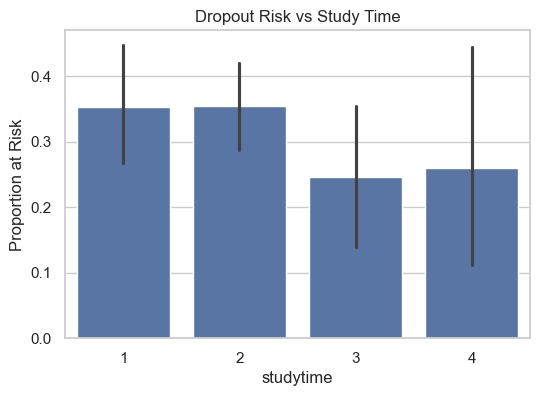

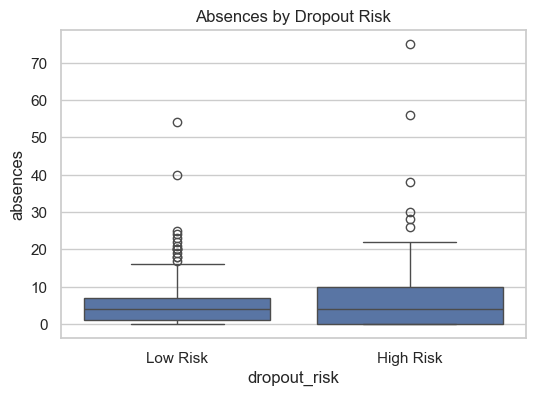

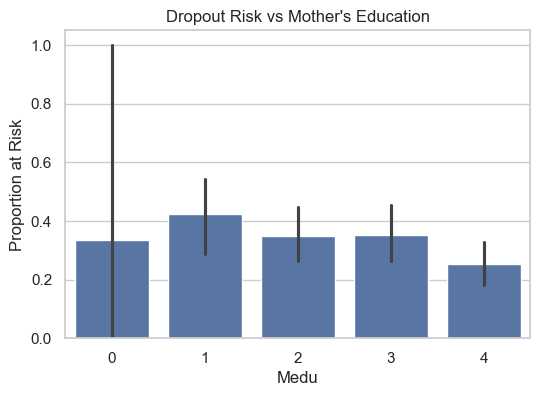

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Dropout Risk vs Study Time
plt.figure(figsize=(6, 4))
sns.barplot(x='studytime', y='dropout_risk', data=df)
plt.title('Dropout Risk vs Study Time')
plt.ylabel('Proportion at Risk')
plt.show()

# Absences by Dropout Risk
plt.figure(figsize=(6, 4))
sns.boxplot(x='dropout_risk', y='absences', data=df)
plt.title('Absences by Dropout Risk')
plt.xticks([0, 1], ['Low Risk', 'High Risk'])
plt.show()

# Dropout Risk vs Mother's Education
plt.figure(figsize=(6, 4))
sns.barplot(x='Medu', y='dropout_risk', data=df)
plt.title("Dropout Risk vs Mother's Education")
plt.ylabel('Proportion at Risk')
plt.show()

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.92      0.79        52
           1       0.56      0.19      0.28        27

    accuracy                           0.67        79
   macro avg       0.62      0.55      0.53        79
weighted avg       0.64      0.67      0.61        79

Confusion Matrix:
 [[48  4]
 [22  5]]


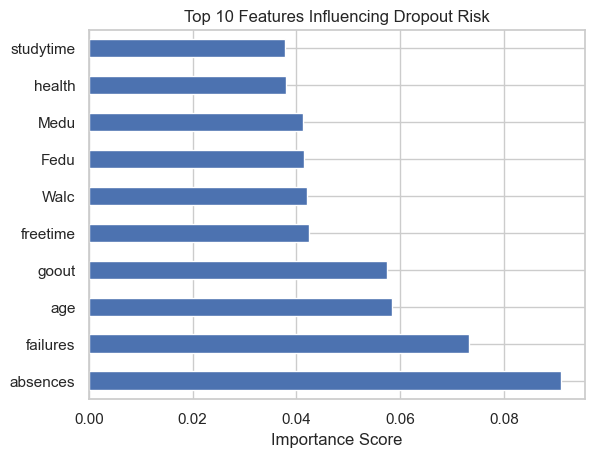

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Prepare Features
X = df.drop(['G1', 'G2', 'G3', 'dropout_risk'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df['dropout_risk']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 5: Feature Importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Features Influencing Dropout Risk')
plt.xlabel('Importance Score')
plt.show()